In [ ]:
import os
import numpy as np
import pandas as pd

path = 'D:\\data\\Mobike\\trips\\'
# path2 = 'E:\\data\\Mobike\\byday\\20180901\\'
# f = os.listdir(path2)
# ID = []
# for i in f:
#     print(i)
#     d = pd.read_csv(path2 + i)
#     ID += list(d.ID)
# print(len(list(set(ID)))) 286163
data = pd.read_csv(path + '20180901_trips.csv')
# data['clock'] = data['st'].apply(lambda x: int(x.split()[1].split(':')[0]))
# data['minute'] = data['st'].apply(lambda x: int(x.split()[1].split(':')[1]))
data
# print(data.ID.size) 1735550
# print(data.ID.unique().size) 277986

20180901_trips_20.csv
1786086
767480
210033


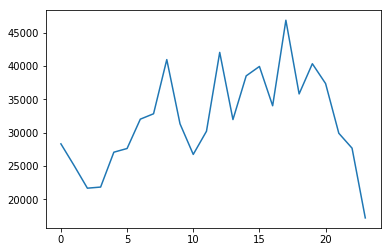

20180902_trips_20.csv
1802311
790462
210013


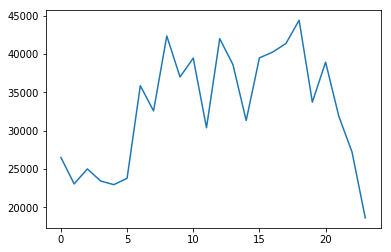

20180903_trips_20.csv
1833426
808084
211789


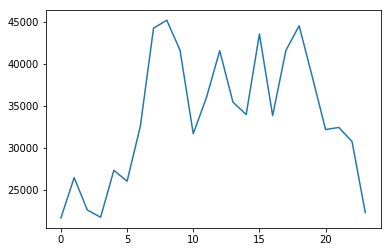

20180904_trips_20.csv
1815272
815305
211862


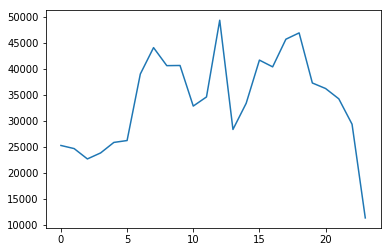

20180905_trips_20.csv
1858804
841495
211702


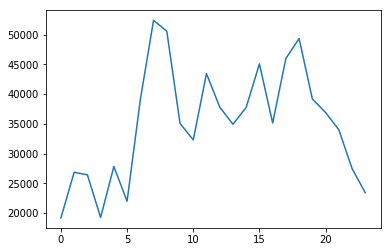

20180906_trips_20.csv
1831060
824837
212431


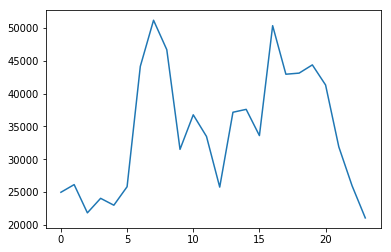

20180907_trips_20.csv
1863227
858227
214015


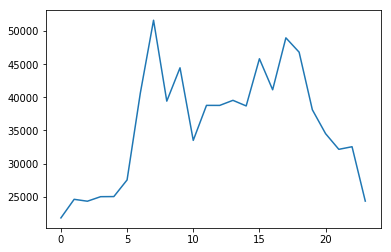

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from geopy.distance import geodesic

path = 'D:\\data\\Mobike\\trips_20\\'
f = os.listdir(path)
for j in f:
    print(j)
    data = pd.read_csv(path + j)
    # data.info()
#     data['iclock'] = data['st'].apply(lambda x: int(x.split()[1].split(':')[0]))
#     data['iminute'] = data['st'].apply(lambda x: int(x.split()[1].split(':')[1]))
#     data['oclock'] = data['et'].apply(lambda x: int(x.split()[1].split(':')[0]))
#     data['ominute'] = data['et'].apply(lambda x: int(x.split()[1].split(':')[1]))
#     data.to_csv(path + j, index=False)
    # print(data[data.distance > 20]['ID'].unique().size)
    # print(data[data.distance > 50]['ID'].unique().size)
    # print(data[data.distance > 1000]['ID'].unique().size)
    print(data.shape[0])
    print(data[data.distance > 20]['ID'].size)
    print(data[data.distance > 20]['ID'].unique().size)

    sdata = data[data.distance > 20]
    hourTrips = np.zeros(24)
    for i in range(0, 24):
        hourTrips[i] = sdata[sdata.iclock == i].shape[0]

    x = range(len(hourTrips))
    plt.plot(x, hourTrips)
    plt.show()

In [ ]:
import os
import numpy as np
import pandas as pd

path = 'D:\\data\\Mobike\\trips_20\\'
path2 = 'D:\\data\\Mobike\\trips_20_20\\'
path3 = 'D:\\data\\Mobike\\trips_20_20_site\\'

f = os.listdir(path2)

def getisite(x):
    return (x.slat, x.slon)

def getosite(x):
    return (x.elat, x.elon)

# for j in f:
#     data = pd.read_csv(path + j)
#     data = data[data.distance > 20]
#     data.to_csv(path2 + j + '_20.csv')
#     data['isite'] = data.apply(getisite, axis=1)
#     data['osite'] = data.apply(getosite, axis=1)
#     print(data.shape[0])

# data.isite.unique().size 1782354
# data.shape[0] 1786086

for i in f:
    data = pd.read_csv(path2 + i)
    data1 = pd.DataFrame(data[['slon', 'slat']])
    data2 = pd.DataFrame(data[['elon', 'elat']])
    data1['idx'] = data.index
    data2['idx'] = data.index
    data1.to_csv(path3 + i.split('.')[0] + '_s.csv', index=False)
    data2.to_csv(path3 + i.split('.')[0] + '_e.csv', index=False)
    
print('done')
    

In [ ]:
#generate new subdistract file

import shapefile as shp
sf = shp.Reader('E:\\Graduate\\Wuhan_jiedao\\jiedao', encoding='gbk')
# print(file)
# shapes = sf.shapes()
# shapes[3].points
f = sf.fields
# cnt = 0
# for i in f:
#     print(cnt)
#     cnt += 1
#     print(i)
    
# sf.shapeType
w = shp.Writer('E:\\Graduate\\jiedao_new\\jiedao.shp', shapeType=5)
w.fields = [f[1], f[8]]

sr = sf.shapeRecords()

main_city = ['江岸区', '江汉区', '硚口区', '汉阳区', '武昌区', '洪山区', '青山区']
for i in sr:
    r = i.record
    if r[7] not in main_city or r[0] == '石洞街道': continue 
    s = i.shape 
    w.record(r[0], r[7])
    w.shape(s)

w.close()
print("done")

ff = shp.Reader('E:\\Graduate\\jiedao_new\\jiedao')
ff.records()




In [ ]:
#transform points to shp
import os
import pandas as pd
import shapefile as shp

path = 'D:\\data\\Mobike\\trips_20_20_site\\'
path2 = 'D:\\data\\Mobike\\trips_20_20_site_shp\\'

f = os.listdir(path)
for i in f:
    data = pd.read_csv(path + i)
    w = shp.Writer(path2 + i.split('.')[0] + '_shp')
    w.field('idx', 'N')
    if 'e' in i:
        for j in data.index:
            w.point(data.loc[j].elon, data.loc[j].elat)
            w.record(data.loc[j].idx)
    else:
        for j in data.index:
            w.point(data.loc[j].slon, data.loc[j].slat)
            w.record(data.loc[j].idx)
    w.close()
    print(i)
print("done")

In [ ]:
#get subdistract label for every coordinate using arcpy
import os
import arcpy
from arcpy import env

path = 'D:\\data\\Mobike\\trips_20_20_site_shp\\'
path2 = 'D:\\data\\Mobike\\trips_20_20_site_jiedao\\'
idFeatures = 'E:\\Graduate\\jiedao_new\\jiedao.shp'

f = os.listdir(path)
for i in f:
    name = i.split('.')
    if name[1] != 'shp' or len(name) > 2: continue
    print(i)
    inFeatures = path + i
    outFeatures = path2 + name[0] + '_jiedao.shp'
    arcpy.Identity_analysis (inFeatures, idFeatures, outFeatures)



In [ ]:
#tranform shapefile to csv with subdistract label
import pandas as pd
import shapefile as shp
path = 'D:\\data\\Mobike\\trips_20_20_site_jiedao\\'
path2 = 'D:\\data\\Mobike\\trips_20_20_site_jiedao_csv\\'
f = os.listdir(path)
for i in f:
    name = i.split('.')
    if name[1] != 'shp' or len(name) > 2: continue
    print(i)
    sf = shp.Reader(path + i)
    r = sf.records()
    data = pd.DataFrame(r, columns=['none', 'idx', 'sdID', 'subdistract', 'distract'])
    data = data.drop(['none'], axis=1)
    data['idx'] = data['idx'].astype('int')
    data = data.sort_values(by=['idx'])
    data = data.drop_duplicates(['idx'])
    print(len(data))
    data.to_csv(path2 + i.split('.')[0] + '.csv', index=False)

    
# print(list(r[0]))
# print(type(r[0]))
# df = pd.DataFrame(r, columns=['one', 'two', 'three', 'f', 'five'])
# print(df[df.three > -1])

In [20]:
#export sdID-subdistract table
import os
import pandas as pd
import shapefile as shp

path = 'D:\\data\\Mobike\\trips_20_20_site_jiedao_csv\\'
path2 = 'E:\Graduate\jiedao_new\\'
# f = os.listdir(path)
# data = pd.read_csv(path + f[11])
# print(len(set(data.sdID)))

sf = shp.Reader(path2 + 'jiedao.shp')
r = sf.records()
data = pd.DataFrame(r, columns=['sudistract', 'distract'])
data['sdID'] = data.index
data.to_csv('sdID-Name.csv', encoding='ANSI', index=False)

data


,sudistract,distract,sdID
0,月湖街道,汉阳区,0
1,洲头街道,汉阳区,1
2,江汉二桥街道,汉阳区,2
3,翠微街道,汉阳区,3
4,五里墩街道,汉阳区,4
5,建桥街道,汉阳区,5
6,鹦鹉街道,汉阳区,6
7,晴川街道,汉阳区,7
8,江堤街道,汉阳区,8
9,六角亭街道,硚口区,9


In [14]:
#merge trips with subdistract label
import os
import pandas as pd

path = 'D:\\data\\Mobike\\trips_20_20\\'
path2 = 'D:\\data\\Mobike\\trips_20_20_site_jiedao_csv\\'
path3 = 'D:\\data\\Mobike\\trips_20_20_subdistract\\'
f = os.listdir(path)
for i in f:
    print(i)
    data = pd.read_csv(path + i)
    start = pd.read_csv(path2 + i.split('.')[0] + '_s_shp_jiedao.csv')
    end = pd.read_csv(path2 + i.split('.')[0] + '_e_shp_jiedao.csv')
    print('%d %d %d' % (len(data), len(start), len(end)))
    data['ssdID'] = start['sdID']
    data['esdID'] = end['sdID']
    data.to_csv(path3 + i.split('.')[0] + '_subdistract.csv', index=False)
print('done')

20180901_trips_20_20.csv
767480 767480 767480
20180902_trips_20_20.csv
790462 790462 790462
20180903_trips_20_20.csv
808084 808084 808084
20180904_trips_20_20.csv
815305 815305 815305
20180905_trips_20_20.csv
841495 841495 841495
20180906_trips_20_20.csv
824837 824837 824837
20180907_trips_20_20.csv
858227 858227 858227
done


In [21]:
import os
import pandas as pd

path = 'D:\\data\\Mobike\\trips_20_20_subdistract\\'
f = os.listdir(path)
data = pd.read_csv(path + f[0])
print(len(data))
print(len(data[data.ssdID != data.esdID]))

767480
83480
